[Linear Regrssion With Time Series](https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series)  

시계열을 사용한 선형 회귀


# Welecome to Tiem Series!
**예측(forecasting)**은 현실에서 사용하는 가장 흔한 머신러닝 응용 프로그램일 것이다. 기업은 제품 수요를 예측하고, 정부는 경제 및 인구 증가를 예측하며, 기상학자는 날씨를 예측한다. 미래에 대한 이해는 과학, 정부, 산업 전반에 걸쳐 시급한 요구 사항이며(개인 역시 말할 것 없이) 이 분야의 실무자들은 이러한 요구 사항을 해결하기 위해 점점 더 머신러닝을 적용하고 있다.   

시계열 예측은 오랜 역사를 가진 광범위한 분야이다.  
이 과정은 가장 정확한 예측을 생성하는 것을 목표로 시계열 데이터에 최신 머신 러닝 방법을 적용하는데 중점을 둔다.  
이 과정은 과거 Kaggle 예측 대회에서 우승한 솔루션에서 영감을 얻었지만 정확한 예측이 우선시 될 때마다 적용할 수 있다.

이 과정을 마치면, 다음과 같은 방법을 알게 될 것이다. 
* 주요 시계열 구성요소(추세, 계절 및 주기)를 모델링하기 위한 엔지니어링 기능.
* 많은 종류의 시계열 플롯으로 시계열 시각화.
* 보완 모델의 장점을 결합한 예측 하이브리드 생성.
* 다양한 예측 작업에 기계 학습 방법 적용.

연습의 일환으로 [Store Sales-Time Series Forecasting](https://www.kaggle.com/c/store-sales-time-series-forecasting)대회에 참가해보자. 대회에서는 Corporaction Favoria(에콰도르에 기반을 둔 대형 식료품 소매업체)의 거의 1800개 제품 범주에서 판매를 예측해야 한다. 

# What is a Time Series
예측의 기본 대상은 시간이 지남에 따라 기록된 일연의 관측값인 시계열이다. 예측 애플리케이션에서 관찰은 일반적으로 매일 또는 매월과 같은 규칙적인 빈도로 기록된다. 

In [8]:
import pandas as pd

# oil.csv로 연습
df=pd.read_csv('./data/oil.csv', index_col='date', parse_dates=['date'])

df.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [2]:
df.tail()

,dcoilwtico
date,
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46
2017-08-30,45.96
2017-08-31,47.26


이 시리즈는 2013년 1월부터 8월까지의 일일 유가가 기록되어 있다. 

# Linear Regression with Time Series
이 과정의 첫 번째 부분에서 선형 회귀 알고리즘을 사용해 예측 모델을 구성한다.  
선형 회귀는 실제로 널리 사용되며 복잡한 예측 작업에도 자연스럽게 적용된다.  

**Linear Regression** 알고리즘은 입력 기능(input feature)에서 가중치 합을 만드는 방법을 배운다. 두 가지 feature의 경우 다음과 같다. 

**Target = weight_1 * feature_1 + weight_2 * feature_2 + bias**

훈련 중 회귀 알고리즘은 목표에 가장 잘 맞는 매개변수 weight_1, weight_2 및 bias에 대한 값을 학습한다.  
(이 알고리즘은 목표와 예측 사이의 제곱 오차를 최소화하는 값을 선택하기 때문에 최소 제곱이라 한다.)  
가중치는 회귀 계수라고도 하며, 편향은 이 그래프의 위치를 알려 주기 때문에 절편이라고도 한다. (가중치=회귀계수, 편향=절편)  

## Time-step features
시계열에 고유한 변수에는 시간 순차성(time-step) 변수와 지연(lag) 변수로 두 가지 종류가 있다. 

시간 순차성(time-step) 변수는 시간 인덱스에서 직접 파생할 수 있는 변수이다. 가장 기본적이 시간 단계 변수는 시리즈의 시간 단계를 처음부터 끝까지 계산하는 시간 더미이다. 

In [3]:
import numpy as np
df['Time']=np.arange(len(df.index))
df.head()

,dcoilwtico,Time
date,,
2013-01-01,NaN,0
2013-01-02,93.14,1
2013-01-03,92.97,2
2013-01-04,93.12,3
2013-01-07,93.20,4


시간 더미를 사용한 선형 회귀 분석에서는 다음과 같은 모형을 생성한다.  
**target = weight * time + bias**  
그런 다음 시간 더미를 사용하면 시간이 X축을 형성하는 time plot의 시계열에 곡선을 맞출 수 있다. 

Text(0.5, 1.0, 'Time Plot of dcoilwtico Sales')

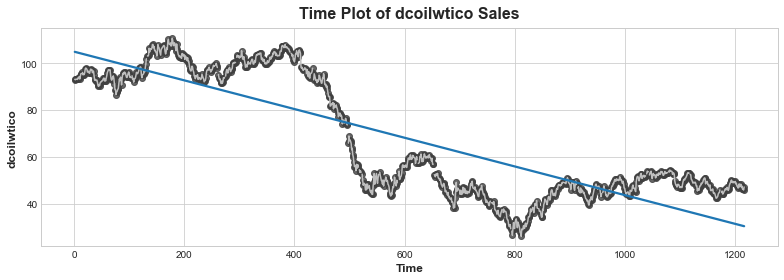

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc(
    'figure',
    autolayout=True,
    figsize=(11,4),
    titlesize=18,
    titleweight='bold'
)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=16,
    titlepad=10,
)
%config INlineBakend.figure_format='retina'

fig,ax=plt.subplots()
ax.plot('Time','dcoilwtico', data=df, color='0.75')
ax=sns.regplot(x='Time', y='dcoilwtico', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of dcoilwtico Sales')

Time-step 변수를 사용하면 **시간 종속성(time dependence)**을 모델링할 수 있다.  
시계열은 값이 발생한 시점부터 에측할 수 있는 경우 시간에 따라 달라진다.  
일일 유가 시리즈에서는 상반기가 하반기에 비해 가격이 높은 것을 알 수 있다. 

## Lag features
**지연 변수 (Lag features)**를 만들기 위해 대상 계열의 관측값을 이동해 나중에 발생한 것처럼 보이도록 한다.  
여기에서 1단계 Lag features를 만들었지만 여러 단계로 이동하는 것도 가능하다. 

In [5]:
df['Lag_1']=df['dcoilwtico'].shift(1)
df=df.reindex(columns=['dcoilwtico','Lag_1'])

df.head()

,dcoilwtico,Lag_1
date,,
2013-01-01,NaN,NaN
2013-01-02,93.14,NaN
2013-01-03,92.97,93.14
2013-01-04,93.12,92.97
2013-01-07,93.20,93.12


Lag featuer가 있는 선형 회귀는 다음과 같은 모델을 생성한다.  
**target = weight * lag + bias**

따라서, Lag feature를 사용하면 시계열의 각 관측치가에 대해 표시된 lag plot에 곡선을 맞출 수 있다. 

Text(0.5, 1.0, 'Lag Plot of Dcoilwtico Sales')

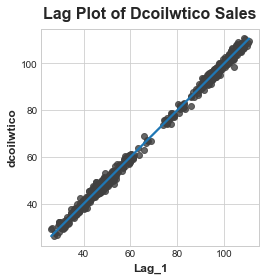

In [6]:
fig, ax=plt.subplots()
ax=sns.regplot(x='Lag_1', y='dcoilwtico', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Dcoilwtico Sales')

시차 도표를 보면 하루 동안의 유가가(dcoilwtico) 전날의 유가(Lag_1)와 상관관계가 있음을 알 수 있다.  
이와 같은 관계를 볼 때, lag feature가 유용할 것이라는 것을 알 수 있다. 

보다 일반적으로 lag feature을 사용하면 **[직렬 종속성(Serial Dependence)](https://jov.arvojournals.org/article.aspx?articleid=2756149)**을 모형화할 수 있다.  
시계열은 이전 관측치로부터 미래의 관측치를 예측할 수 있을때 직렬 의존성을 갖는다.  
*일일 유가*에서는 일반적으로 하루동안 높은 판매량은 다음날의 높은 판매량을 의미한다고 예측할 수 있다. 

** Serial Dependence, 특징이나 사물에 대한 인식을 최근의 감각 입력으로 체계적으로 편향시키는 현상이다...(중략)..  
Serial Dependence는 자극에 대한 이전 결정의 영향이 아니라 오히려 이전 자극을 인식하는 효과일 가능성이 높다.  



---
기계 학습 알고리즘을 시계열 문제에 적용하는 것은 주로 time index및 lag을 사용한 변수 엔지니어링에 관한 것이다.  
대부분의 과정에서는 선형 회귀 분석을 단순화하기 위해 사용하지만 이러한 기능은 예측 작업에 대해 어떤 알고리즘을 선택하든 유용하다. 

# 예시 - Tunnel Traffic
Tuunel Traffic은 2003년부터 2005년 11월까지 매일 스위스의 Baregg 터널을 통과하는 차량 수를 설명하는 시계열이다.  
이 예에서는 time-step features와 lag features에 선형회귀를 적용하는 연습을 할 것이다. 

In [37]:
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter('ignore')  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True, figsize=(11,4))
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10
)
plot_params=dict(
    color='0.75',
    style='.-',
    markeredgecolor='.25',
    markerfacecolor='0.25',
    legend=False,
)
%config InlinBackend.figure_format='retina'

# Load Tunnel Traffic dataset
tunnel = pd.read_csv('./data/tunnel.csv', parse_dates=['Day'])

# 인덱스를 날짜열로 설정해 pandas에서 시계열 생성
# 다음과 같은 경우 'parse_dates'를 사용해 "일"을 날짜 유형으로 파싱
tunnel=tunnel.set_index('Day')

# 기본적으로 pandas는 dtype이 'TimeStamp'인 'DatetimeIndex'를 생성하며 이는 np.datatime64와 동일하다
## (시계열을 단일 순간에 측정한 시퀀스로 나타냄)  
# 반면, 'PeriodIndex'는 일정 기간동안 누적된 수량의 시퀀스로 시계열을 나타낸다. 
# Period는 작업하기 쉬운 경우가 많으므로, 이 과정에서는 Period를 사용할 것이다. 
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


## Time-step feature
시계열에 누락된 날짜가 없으면, 시계열의 길이를 계산해 시간 더미를 만들수 있다.

In [55]:
df=tunnel.copy()

df['Time']=np.arange(len(tunnel.index))
df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


선형 회귀 모델을 피팅하는 절차는 scikit-learn의 표준 단계를 따른다. 

In [30]:
from sklearn.linear_model import LinearRegression

# Training data
X=df.loc[:,['Time']]         # features
y=df.loc[:,'NumVehicles']  # target

# Train the model
model=LinearRegression()
model.fit(X,y)

# 피팅된 값을 다음과 같은 time index를 가진 시계열로 저장한다. 
# Train data
y_pred=pd.Series(model.predict(X), index=X.index)

실제 생성된 모델은(대략) **Vehicles = 22.5 * Time + 98176**이다.  
시간 경과에 따른 적합치를 표시하며 선형 회귀 분석을 시간 더미에 적합하면, 위 방정식에 의해 정의된 추세선을 만들 수 있다. 


Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

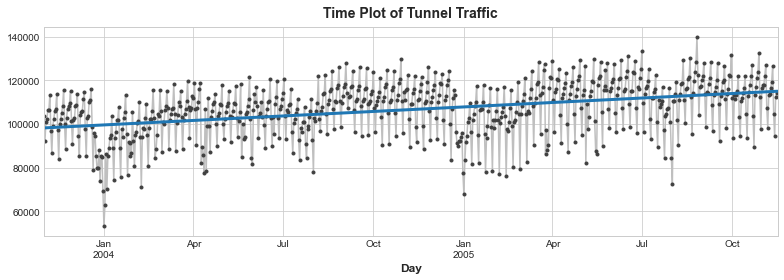

In [40]:
ax=y.plot(**plot_params)
ax=y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Tunnel Traffic')

## Lag feature
Pandas는 lag series를 위한 간단한 방법인 *shift*를 제공한다. 

In [56]:
df['Lag_1']=df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


lag features를 생성할 때 생성된 결측값을 어떻게 처리할지 결정해야 한다.  
이 결측값을 채우기 위해 0.0 혹은 'backfill' 옵션을 사용해야 할 것이다.   
그러나 위 옵션들 대신, 누락된 값과 해당 날짜의 값을 삭제할 것이다. 

In [68]:
X=df.loc[:,['Lag_1']]
X.dropna(inplace=True)

y=df.loc[:,'NumVehicles']
y,X=y.align(X, join='inner')

model=LinearRegression()
model.fit(X,y)

y_pred=pd.Series(model.predict(X), index=X.index)

lag plot은 하루 차량 수와 전날 차량 수 간의 관계를 얼마나 잘 맞출 수 있었는지 보여준다. 

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

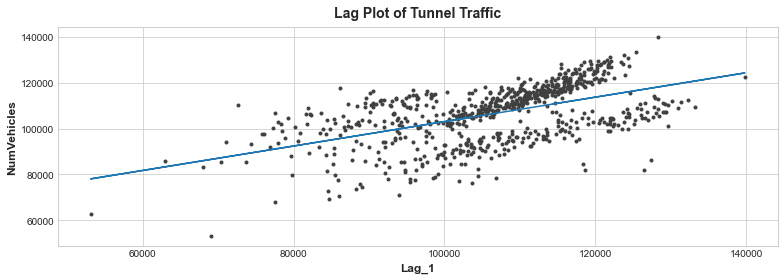

In [76]:
fig,ax=plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='.25')
ax.plot(X['Lag_1'], y_pred)

# ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

lag features로부터 나온 예측은 우리가 시간의 경과에 따라 어떻게 잘 예측할 수 있을지를 의미한다.  
다음 time plot은 현재 예측이 최근 일련의 동작에 어떻게 반응하는지 보여준다.  

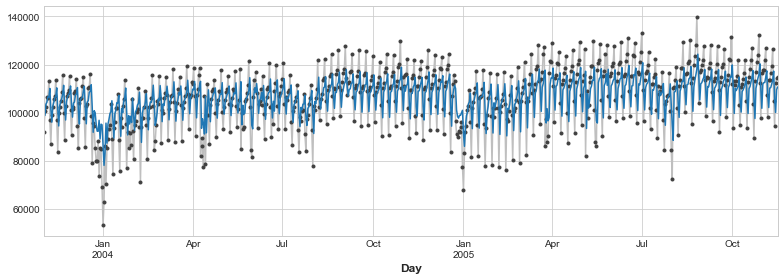

In [78]:
ax=y.plot(**plot_params)
ax=y_pred.plot()

최고의 시계열 모델에는 일반적으로 time-step과 lag featuers 조합이 포함된다.  
다음 몇 단원에서 이 단원의 기능을 시작점으로 사용해 시계열에서 가장 일반적인 패턴을 모델링하는 feature engineering 방법을 배울 것이다.